In [1]:
import re
from itertools import product

import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def plot_confusion_matrix_and_print_metrics(y_pred, y_true):
    conf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['No Spam', 'Spam'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['No Spam', 'Spam'])
    plt.show()
    print(conf_matrix)
    print(classification_report(y_true, y_pred))


def print_model(_model, preds, trues):
    print(_model)
    print(f'\taccuracy: {accuracy_score(preds, trues)}')
    print(f'\tprecision: {precision_score(trues, preds)}')
    print(f'\trecall: {recall_score(trues, preds)}')
    print(f'\tf1: {f1_score(preds, trues)}')
    print(f'\troc_auc: {roc_auc_score(preds, trues)}')

def visualize_model(preds, trues, probs=None):
    if probs is not None:
        ns_probs = [0 for _ in range(len(trues))]
        fpr, tpr, _ = roc_curve(trues, probs)
        plt.plot(fpr, tpr)
        fpr, tpr, _ = roc_curve(trues, ns_probs)
        plt.plot(fpr, tpr)

    plt.figure()
    plot_confusion_matrix_and_print_metrics(preds, trues)
    

def train_and_eval_model(max_features: int, max_depth: int, verbose=False) -> float:
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    X = vectorizer.fit_transform(corpus).toarray()
    y = data['spam']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    rf_clf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf_clf.fit(X_train, y_train)

    probs = rf_clf.predict_proba(X_test)[:, 1]
    preds = rf_clf.predict(X_test)
    
    if verbose:
        visualize_model(preds, y_test, probs)
        print_model(rf_clf, preds, y_test)
        

    return roc_auc_score(y_test, preds)

In [3]:
data = pd.read_csv('data/dataset_lab2.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
text = data['text']

# Only words and digits separated with space, then lower< then split, then remove common word 'subject'   
text = text.apply(lambda x:
                  re.sub('[^a-zA-Z0-9]+', ' ', x)
                  .lower()
                  .split()
                  [1:])
text

0       [naturally, irresistible, your, corporate, ide...
1       [the, stock, trading, gunslinger, fanny, is, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [4, color, printing, special, request, additio...
4       [do, not, have, money, get, software, cds, fro...
                              ...                        
5723    [re, research, and, development, charges, to, ...
5724    [re, receipts, from, visit, jim, thanks, again...
5725    [re, enron, case, study, update, wow, all, on,...
5726    [re, interest, david, please, call, shirley, c...
5727    [news, aurora, 5, 2, update, aurora, version, ...
Name: text, Length: 5728, dtype: object

In [5]:
ps = PorterStemmer()
stops = set(stopwords.words('english'))
# remove stops
text = text.map(lambda l: list(filter(lambda x: x not in stops, l)))
print(text[0])
# stem
text = text.map(lambda l: list(map(lambda x: ps.stem(x), l)))
print(text[0])

['naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 'affordabil

In [6]:
corpus = text.map(lambda x: ' '.join(x))

corpus

0       natur irresist corpor ident lt realli hard rec...
1       stock trade gunsling fanni merril muzo colza a...
2       unbeliev new home made easi im want show homeo...
3       4 color print special request addit inform cli...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    research develop charg gpg forward shirley cre...
5724    receipt visit jim thank invit visit lsu shirle...
5725    enron case studi updat wow day super thank muc...
5726    interest david pleas call shirley crenshaw ass...
5727    news aurora 5 2 updat aurora version 5 2 faste...
Name: text, Length: 5728, dtype: object

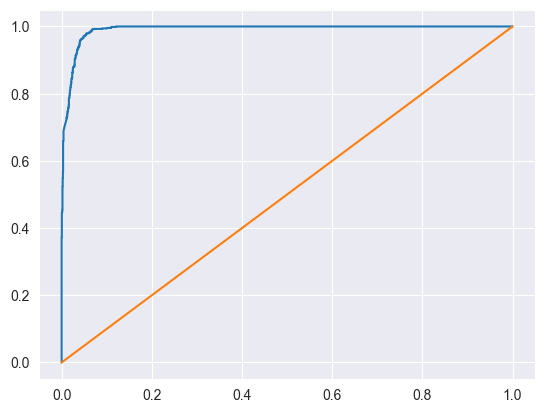

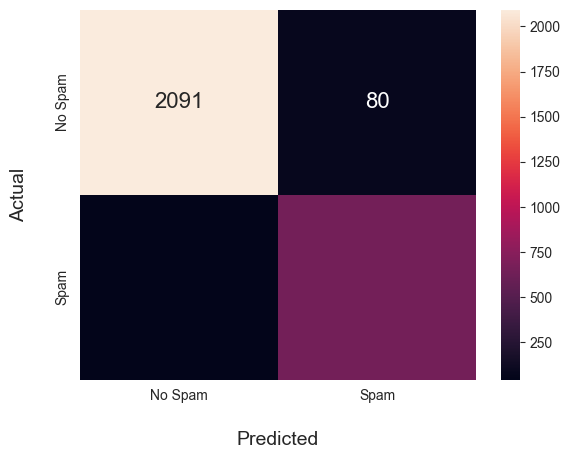

[[2091   80]
 [  45  648]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2171
           1       0.89      0.94      0.91       693

    accuracy                           0.96      2864
   macro avg       0.93      0.95      0.94      2864
weighted avg       0.96      0.96      0.96      2864

RandomForestClassifier(max_depth=14, n_jobs=-1)
	accuracy: 0.9563547486033519
	precision: 0.8901098901098901
	recall: 0.935064935064935
	f1: 0.912033779028853
	roc_auc: 0.9345212371897764


In [7]:
feats = [150]
depths = [14]

roc_scores = np.array([[train_and_eval_model(f, d, verbose=True) for f in feats] for d in depths])

[]

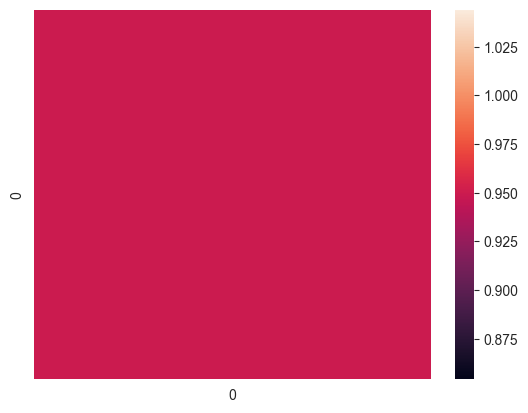

In [8]:
sns.heatmap(roc_scores)
plt.plot()

In [9]:
top = 5
if len(roc_scores) >= top:
    flat = roc_scores.flatten()
    ind = np.argpartition(flat, -top)[-top:]
    ind = ind[np.argsort(flat[ind])[::-1]]
    best_params = np.array(list(product(feats, depths)))[ind]
    print('score\tfeats depth')
    for i, j in zip(best_params, flat[ind]):
        print(f'{j:.5f}, {i}')
else:
    print(f'top {top} is too big. got only {len(roc_scores)} scores')

top 5 is too big. got only 1 scores


In [10]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=150)
X = vectorizer.fit_transform(corpus).toarray()
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


LSTM

In [11]:
y =abs( y-1)
text_x_train, text_x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=0)

In [12]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(text_x_train)
sequences = tokenizer.texts_to_sequences(text_x_train)

In [13]:
sequences_matrix = pad_sequences(sequences, maxlen=150)

In [14]:
sequences_matrix

array([[  0,   0,   0, ..., 194, 134, 135],
       [  0,   0,   0, ...,  52,  27,  66],
       [  0,   0,   0, ...,  70, 159, 349],
       ...,
       [  0,   0,   0, ..., 297, 351, 275],
       [  0,   0,   0, ..., 193, 312,  12],
       [  0,   0,   0, ..., 194,  68,  51]])

In [15]:
model = Sequential([
    layers.Embedding(input_dim=500, output_dim=32),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=losses.binary_crossentropy,
                   optimizer=optimizers.RMSprop(), metrics=['accuracy', F1Score, AUC, Precision, Recall])
model.fit(sequences_matrix, y_train, batch_size=128,
               epochs=5, validation_split=0.1)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - accuracy: 0.7383 - auc: 0.6806 - f1_score: 0.8586 - loss: 0.5556 - precision: 0.7795 - recall: 0.9047 - val_accuracy: 0.8932 - val_auc: 0.9507 - val_f1_score: 0.8695 - val_loss: 0.2618 - val_precision: 0.9524 - val_recall: 0.9065
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.9108 - auc: 0.9575 - f1_score: 0.8622 - loss: 0.2386 - precision: 0.9655 - recall: 0.9150 - val_accuracy: 0.9499 - val_auc: 0.9721 - val_f1_score: 0.8695 - val_loss: 0.1599 - val_precision: 0.9882 - val_recall: 0.9462
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.9486 - auc: 0.9794 - f1_score: 0.8630 - loss: 0.1552 - precision: 0.9860 - recall: 0.9458 - val_accuracy: 0.9608 - val_auc: 0.9868 - val_f1_score: 0.8695 - val_loss: 0.1113 - val_precision: 0.9912 - val_recall: 0.9575
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.9693 - auc: 0.9800 - f1_score: 0.8628 - loss: 0.1162 - precision: 0.9861 - recall: 0.

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9438 - auc: 0.9889 - f1_score: 0.8574 - loss: 0.1290 - precision: 0.9893 - recall: 0.9346
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


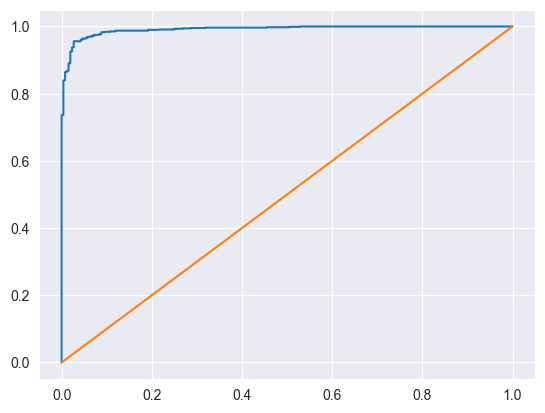

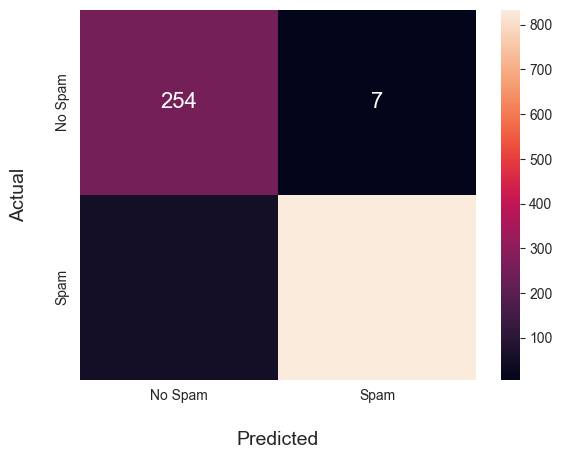

[[254   7]
 [ 52 833]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       261
           1       0.99      0.94      0.97       885

    accuracy                           0.95      1146
   macro avg       0.91      0.96      0.93      1146
weighted avg       0.95      0.95      0.95      1146


In [24]:
test_s = tokenizer.texts_to_sequences(text_x_test)
test_sm = pad_sequences(test_s, maxlen=150)
model.evaluate(test_sm, y_test)

probs = model.predict(test_sm)
visualize_model(probs > 0.5, y_test, probs)
